##Download Data

In [ ]:
!cp -r "/content/drive/MyDrive/splitted" /content/

##Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

img_size = (224, 224)
batch_size = 32
num_classes = 10
data_source = "/content/splitted"
train_data = os.path.join(data_source, "train")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3356 images belonging to 10 classes.
Found 834 images belonging to 10 classes.


##Build & Train model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

# -------- Block 1 --------
model.add(Conv2D(64, (3,3), activation="relu", padding="same",
                 input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2)))

# -------- Block 2 --------
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2)))

# -------- Block 3 --------
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2)))

# -------- Block 4 --------
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2)))

# -------- Block 5 --------
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2)))

# -------- Classifier --------
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# Compile
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │    16,781,31

 Total params: 139,611,210 (532.57 MB)

 Trainable params: 139,611,210 (532.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 75s 707ms/step - accuracy: 0.0838 - loss: 2.3036 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 687ms/step - accuracy: 0.0921 - loss: 2.3026 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 681ms/step - accuracy: 0.1064 - loss: 2.3019 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 687ms/step - accuracy: 0.0992 - loss: 2.3022 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 82s 688ms/step - accuracy: 0.1079 - loss: 2.3033 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 73s 687ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 687ms/step - accuracy: 0.1036 - loss: 2.3029 - val_accuracy: 0.1031 - val_loss: 2.3023
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 75s 712ms/step - accuracy: 0.0957 - loss: 2

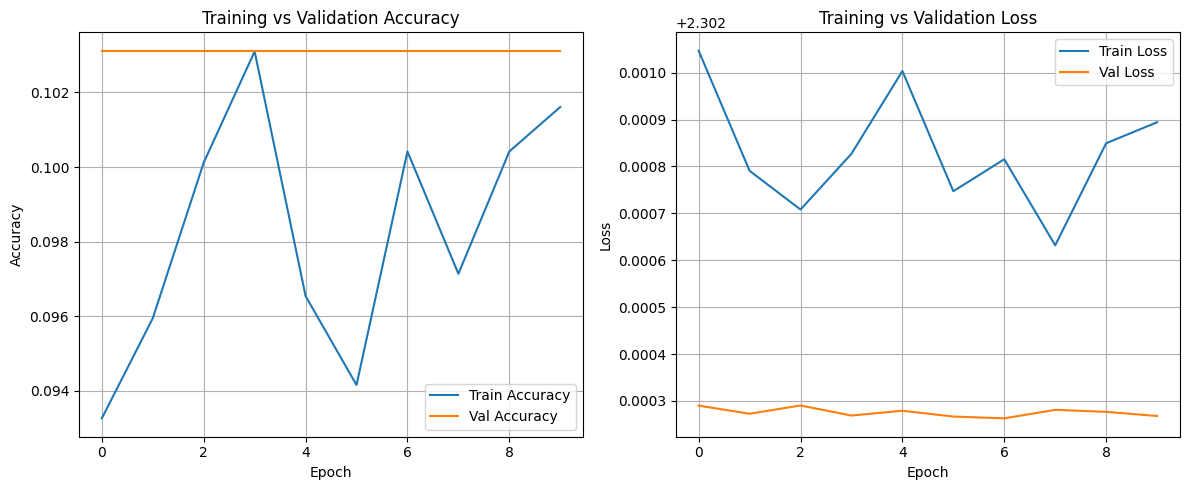

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##Evaluation and visualization


In [ ]:
test_data = os.path.join(data_source, "test")

test_datagen = ImageDataGenerator(rescale=1./255)
img_size = (224, 224)
batch_size = 32
test_gen = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 1053 images belonging to 10 classes.


In [ ]:
import numpy as np

test_gen.reset()

y_test_prob = model.predict(test_gen, verbose=1)
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_true = test_gen.classes

class_names = list(test_gen.class_indices.keys())
num_classes = len(class_names)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 627ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nTest Classification Report:")
print(classification_report(
    y_test_true,
    y_test_pred,
    target_names=class_names,
    digits=4
))

Test Accuracy: 0.10256410256410256

Test Classification Report:
                 precision    recall  f1-score   support

        call_me     0.0000    0.0000    0.0000       106
fingers_crossed     0.0000    0.0000    0.0000       101
           okay     0.1026    1.0000    0.1860       108
          paper     0.0000    0.0000    0.0000       108
          peace     0.0000    0.0000    0.0000       106
           rock     0.0000    0.0000    0.0000       102
        rock_on     0.0000    0.0000    0.0000       107
        scissor     0.0000    0.0000    0.0000       106
         thumbs     0.0000    0.0000    0.0000       108
             up     0.0000    0.0000    0.0000       101

       accuracy                         0.1026      1053
      macro avg     0.0103    0.1000    0.0186      1053
   weighted avg     0.0105    0.1026    0.0191      1053



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


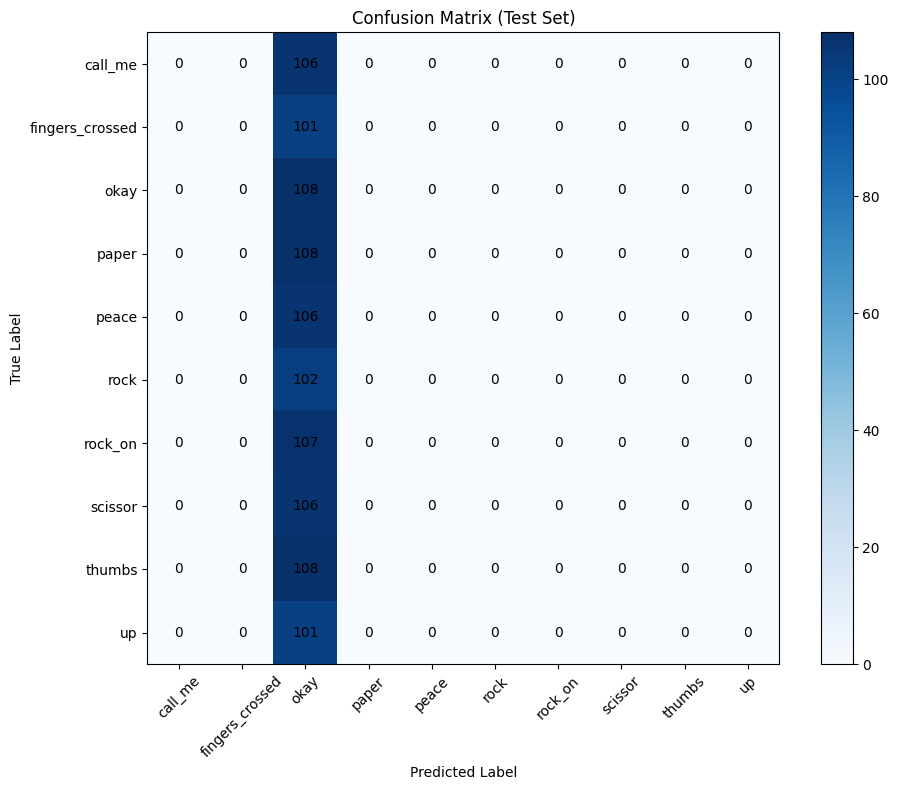

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")   # 🔹 try: "Greens", "Oranges", "Purples"
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.xticks(range(num_classes), class_names, rotation=45)
plt.yticks(range(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


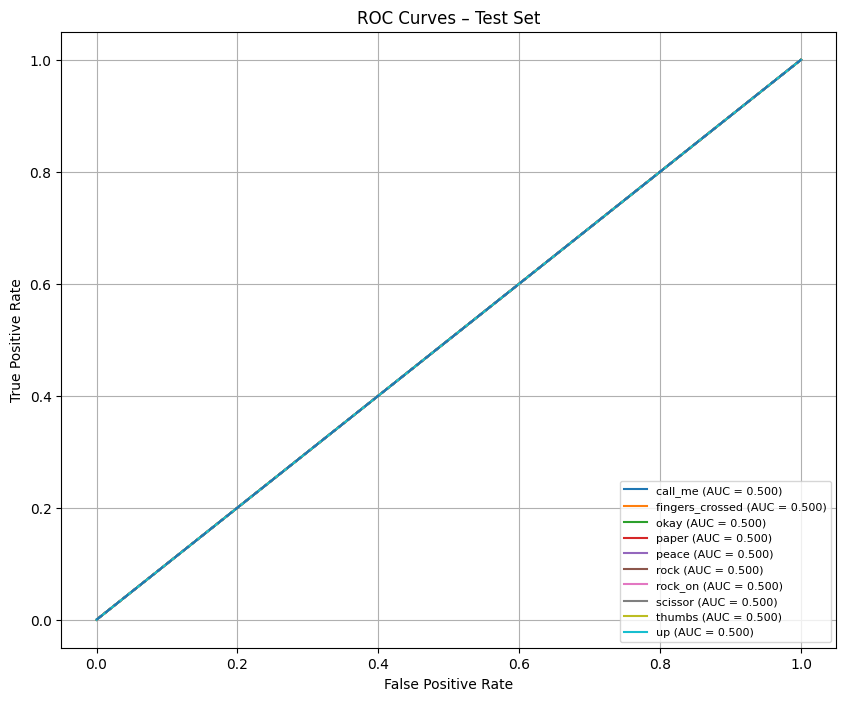

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test_true, classes=range(num_classes))

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Test Set")
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.show()


##Save

In [ ]:
model.save("/content/drive/MyDrive/DL_Colabs/final models/vgg19_scratch.keras")
